In [3]:
!wget https://www.dropbox.com/s/2mowixej1vxk4p5/cat.1.jpg?dl=0

--2020-05-10 15:46:26--  https://www.dropbox.com/s/2mowixej1vxk4p5/cat.1.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2mowixej1vxk4p5/cat.1.jpg [following]
--2020-05-10 15:46:26--  https://www.dropbox.com/s/raw/2mowixej1vxk4p5/cat.1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc86cfdcd388f185ab674f5478d8.dl.dropboxusercontent.com/cd/0/inline/A3fP_XoQPB1FA0mwiPttXFZDqb6lVpfrCgHFZo5UfmxiU1cLyTpluh2uW-zIqtCjk3ch4APLbS39A47ux_MMA01q-dqInICTufzs007Wtp5nBmzJ-5LL_kqnsuzEEuvRM2I/file# [following]
--2020-05-10 15:46:26--  https://uc86cfdcd388f185ab674f5478d8.dl.dropboxusercontent.com/cd/0/inline/A3fP_XoQPB1FA0mwiPttXFZDqb6lVpfrCgHFZo5UfmxiU1cLyTpluh2uW-zIqtCjk3ch4APLbS39A47ux_MMA01q-dqInICTufzs007Wtp5nBmzJ-5LL_k

In [4]:
ls

'cat.1.jpg?dl=0'   sample_data/


In [0]:
### Import the libraries
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import cv2

In [7]:
### Creating the model object
model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 1s 0us/step


In [9]:
img_ = cv2.imread("cat.1.jpg?dl=0")
print("The shape is {}".format(img_.shape))

The shape is (280, 300, 3)


In [15]:
img = cv2.resize(img_,(224,224))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


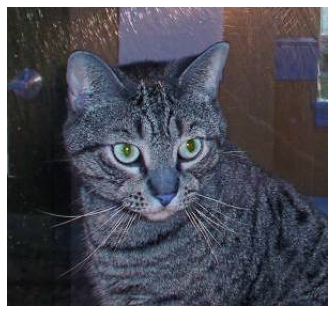

In [17]:
import matplotlib.pyplot as plt
def displayImg(img):
  plt.style.use("seaborn")
  plt.imshow(img,cmap="gray")
  plt.axis("off")
  plt.show()

displayImg(img_)

In [19]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02123045', 'tabby', 0.70335364), ('n02123159', 'tiger_cat', 0.15164523), ('n02124075', 'Egyptian_cat', 0.100950085)]
